In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [17]:
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")

In [18]:
average_time = df["Delivery_Time"].mean()
df["Status"] = df["Delivery_Time"].apply(lambda x: 1 if x > average_time else 0)

In [19]:
X = df[["Traffic_Conditions", "Weather_Conditions", "Delivery_Person_Experience"]]
y = df["Status"]

In [20]:
X = pd.get_dummies(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [25]:
print("Logistic Regression Classification Results:")
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-score:  {f1:.2f}")

Logistic Regression Classification Results:
Accuracy:  0.35
Precision: 0.41
Recall:    0.41
F1-score:  0.41


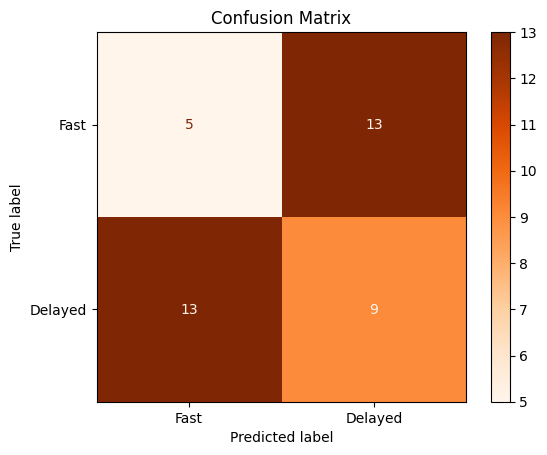

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fast", "Delayed"])
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()

In [27]:
y_probs = model.predict_proba(X_test)[:, 1]

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

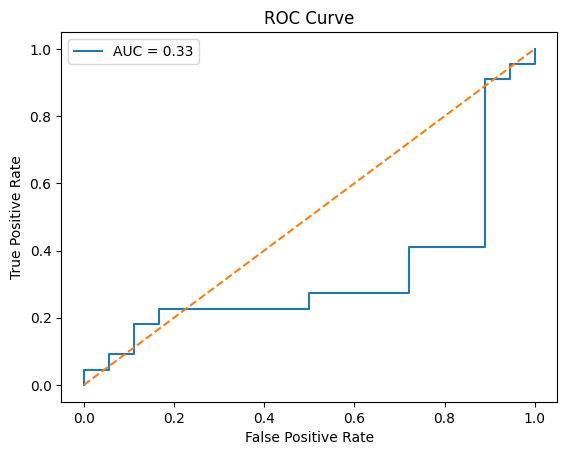

In [29]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()